## imports

### import packages

In [ ]:
#-*-coding:utf-8-*-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
sns.set_style('whitegrid')

### import data

#### ohlcv_data

In [ ]:
zip_file_list = ['commodity.zip', 'currency.zip', 'ohlcv_data.zip']
for zip_file in zip_file_list:
  name = zip_file.split(".")[0]
  with ZipFile(zip_file, 'r') as zip:
    zip.extractall(f'{name}/')
  print('Done')

Done
Done
Done


In [ ]:
# ohlcv 데이터 중 가장 시작 날짜가 늦은 게 무엇인지 알아보자
path = './ohlcv_data/'
ohlcv_file_list = os.listdir(path)
ohlcv_file_list = [file for file in ohlcv_file_list if file.endswith('.csv')]

In [ ]:
# 제일 늦은 것은 2016-03-03 Nikkey225
# 따라서 2016-03-03부터의 데이터를 사용하기로 한다.
# 또한 수익률을 측정해야하기 때문에 pct_change()를 사용해 수익률에 해댱하는 열을 만들어줘야한다.
for file in ohlcv_file_list:
  name = file.split('.')[0]
  df = pd.read_csv(f'ohlcv_data/{file}')
  start_date = df.Date[0]
  print(name, ": ", start_date)

KODEX200 :  2002-10-14
KINDEX일본Nikkey225(H) :  2016-03-03
TIGER유로스탁스50(H) :  2014-04-30
KOSEF단기자금 :  2010-07-29
TIGER코스닥150 :  2015-11-12
KODEX골드선물(H) :  2010-10-01
TIGER차이나CSI300 :  2014-02-17
TIGER미국SP500선물(H) :  2011-07-18
KBSTAR중기우량회사채 :  2011-04-15
KOSEF미국달러선물 :  2011-02-24
TIGER단기선진하이일드(H) :  2014-03-24
KODEX인버스 :  2009-09-16
KOSEF미국달러선물인버스 :  2011-04-01
KOSEF국고채10년 :  2011-10-20
TIGER원유선물(H) :  2010-08-02


In [ ]:
def import_ohlcv_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df["Rate"] = df['Close'].pct_change()
  df.dropna(inplace=True)
  df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(10).sum())-1).shift(-10)
  df.dropna(inplace=True)
  
  return df

In [ ]:
# 데이터 가져오기
KOSEF국고채10년 = import_ohlcv_data('2016-03-03', 'KOSEF국고채10년.csv')
TIGER원유선물 = import_ohlcv_data('2016-03-03', 'TIGER원유선물(H).csv')
KBSTAR중기우량회사채 = import_ohlcv_data('2016-03-03', 'KBSTAR중기우량회사채.csv')
KOSEF미국달러선물 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물.csv')
TIGER차이나CSI300 = import_ohlcv_data('2016-03-03', 'TIGER차이나CSI300.csv')
KODEX200 = import_ohlcv_data('2016-03-03', 'KODEX200.csv')
KOSEF미국달러선물인버스 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물인버스.csv')
KINDEX일본Nikkey225 = import_ohlcv_data('2016-03-03', 'KINDEX일본Nikkey225(H).csv')
KOSEF단기자금 = import_ohlcv_data('2016-03-03', 'KOSEF단기자금.csv')
TIGER유로스탁스50 = import_ohlcv_data('2016-03-03', 'TIGER유로스탁스50(H).csv')
KODEX골드선물 = import_ohlcv_data('2016-03-03', 'KODEX골드선물(H).csv')
TIGER미국SP500선물 = import_ohlcv_data('2016-03-03', 'TIGER미국SP500선물(H).csv')
TIGER코스닥150 = import_ohlcv_data('2016-03-03', 'TIGER코스닥150.csv')
TIGER단기선진하이일드 = import_ohlcv_data('2016-03-03', 'TIGER단기선진하이일드(H).csv')
KODEX인버스 = import_ohlcv_data('2016-03-03', 'KODEX인버스.csv')

In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

close_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Close'
  close_dict[name] = etf_list[i].Close

close_price = pd.DataFrame(close_dict)
close_price['Date'] = KODEX200.Date
close_price

,KODEX200_Close,KINDEX일본Nikkey225(H)_Close,TIGER유로스탁스50(H)_Close,KOSEF단기자금_Close,TIGER코스닥150_Close,KODEX골드선물(H)_Close,TIGER차이나CSI300_Close,TIGER미국SP500선물(H)_Close,KBSTAR중기우량회사채_Close,KOSEF미국달러선물_Close,TIGER단기선진하이일드(H)_Close,KODEX인버스_Close,KOSEF미국달러선물인버스_Close,KOSEF국고채10년_Close,TIGER원유선물(H)_Close,Date
1,9530,10413,9645,8250,9745,21245,93723,11972,3600,23275,110863,94041,6848,10410,10540,2016-03-04
2,9565,10360,9640,8230,9725,21288,93728,11928,3765,23290,110867,94201,6880,10430,10515,2016-03-07
3,9570,10368,9635,8295,9790,21137,93718,11981,3800,23265,111188,94201,6819,10385,10465,2016-03-08
4,9565,10432,9580,8260,9685,21232,93741,12098,3745,23215,111132,94069,6796,10300,10360,2016-03-09
5,9555,10489,9590,8200,9640,21424,93728,11967,3810,23255,111026,94243,6810,10415,10480,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,11720,12715,12635,4450,12435,34985,101370,13285,5520,46120,111385,102555,10180,9415,17675,2022-05-20
1530,11775,12760,12725,4440,12475,35100,101370,13245,5585,46450,111170,102540,10100,9450,17850,2022-05-23
1531,11785,12405,12650,4520,12455,34450,101375,13260,5495,46160,111695,102665,9955,9425,17630,2022-05-24
1532,11800,12600,12700,4505,12495,34595,101385,13260,5580,46505,112110,102645,9870,9445,17620,2022-05-25


In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

volume_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Volume'
  volume_dict[name] = etf_list[i].Volume

volume = pd.DataFrame(volume_dict)
volume['Date'] = KODEX200.Date
volume

,KODEX200_Volume,KINDEX일본Nikkey225(H)_Volume,TIGER유로스탁스50(H)_Volume,KOSEF단기자금_Volume,TIGER코스닥150_Volume,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume,Date
1,201,429737,3274,16488203,142158,7658963,402337,28062,2126369,20731,90,3,512798,11432,25,2016-03-04
2,384,422480,10172,9586362,67391,6940749,247118,56605,3942217,26105,98,82,490423,114302,308662,2016-03-07
3,2,421993,7420,16426298,126211,6926830,200878,25354,3438044,4126,14,0,507145,3178,336969,2016-03-08
4,2,436810,4272,12569213,47065,6053743,719311,10249,1870277,27461,779,104,484589,704,316169,2016-03-09
5,1,423083,5708,22581765,34029,9241212,165302,14659,1862786,10555,762,55,491465,1165,310932,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,10152,76319,8060,51737673,35205,4661990,70569,2823,56571,83142,8418,412,578526,22242,8,2022-05-20
1530,2917,859635,7223,20920712,108427,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617,2022-05-23
1531,2702,133598,2413,23085105,31019,5416640,839,3046,92450,13054,8707,446,348657,6519,29,2022-05-24
1532,387,71766,2713,33444611,62250,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217,2022-05-25


#### famma_french_daily_factor는 4/29 이후로 업데이트가 중단되어 사용하기가 어려울 것으로 보인다...

#### currency 

In [ ]:
Currency = pd.read_csv('currency/currency.csv')
Currency = Currency[Currency.Date >= '2016-03-04'].reset_index(drop=True) # 시작하는 날짜보다 뒤에 있는 것만 가져오기

In [ ]:
currency_list = ['USD', 'JPY', 'CNY', 'EUR']  # 환율 마다 스케일이 다르기 때문에 환율의 변화율로 보는 것이 더 적합하다.
for currency in currency_list:                # 따라서 환율의 변화율을 변수로 설정해주도록 한다.
  col = currency + ' Change'
  Currency[col] = Currency[currency].pct_change()

Currency.drop(currency_list, axis=1, inplace=True)
Currency.fillna(0, inplace=True)

In [ ]:
Currency.head()

,Date,USD Change,JPY Change,CNY Change,EUR Change
0,2016-03-04,0.000000,0.000000,0.000000,0.000000
1,2016-03-07,-0.000217,0.002078,0.003778,0.001160
2,2016-03-08,0.010156,0.007431,0.015867,0.008626
3,2016-03-09,-0.001828,-0.000548,-0.007512,-0.000322
4,2016-03-10,-0.001885,0.013024,-0.000544,-0.003645


#### Commodity

In [ ]:
path = './commodity/'
commodity_file_list = os.listdir(path)
commodity_file_list = [file for file in commodity_file_list if file.endswith('.csv')]

In [ ]:
def import_commodity_data(start, file):
  file_path = f'commodity/{file}'  # 파일 불러오기
  name = file.split('.')[0]
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df.iloc[:,:2]                                # Date를 뺀 가장 첫번째 열이 모두 가격을 나타내므로 이것만을 사용하기로 한다
  df.columns = ['Date', f'{name} Price']                    # 열 이름을 똑같이 변경
  return df

In [ ]:
gold = import_commodity_data('2016-03-04', 'gold.csv')
silver = import_commodity_data('2016-03-04', 'silver.csv')
natural_gas = import_commodity_data('2016-03-04', 'natural_gas.csv')
oil = import_commodity_data('2016-03-04', 'oil.csv')

In [ ]:
gold

,Date,gold Price
0,2016-03-04,1279.900024
1,2016-03-07,1272.300049
2,2016-03-08,1276.300049
3,2016-03-09,1260.000000
4,2016-03-10,1273.000000
...,...,...
1574,2022-06-07,1851.599976
1575,2022-06-08,1855.000000
1576,2022-06-09,1850.099976
1577,2022-06-10,1875.599976


## Make Model

### preparation

In [ ]:
print(ohlcv_file_list)
print(commodity_file_list)
print(['Currency'])

['KODEX200.csv', 'KINDEX일본Nikkey225(H).csv', 'TIGER유로스탁스50(H).csv', 'KOSEF단기자금.csv', 'TIGER코스닥150.csv', 'KODEX골드선물(H).csv', 'TIGER차이나CSI300.csv', 'TIGER미국SP500선물(H).csv', 'KBSTAR중기우량회사채.csv', 'KOSEF미국달러선물.csv', 'TIGER단기선진하이일드(H).csv', 'KODEX인버스.csv', 'KOSEF미국달러선물인버스.csv', 'KOSEF국고채10년.csv', 'TIGER원유선물(H).csv']
['gold.csv', 'natural_gas.csv', 'silver.csv', 'oil.csv']
['Currency']


In [ ]:
ohlcv_list = [KOSEF국고채10년, 
 TIGER원유선물,
 KBSTAR중기우량회사채,
 KOSEF미국달러선물,
 TIGER차이나CSI300,
 KODEX200,
 KOSEF미국달러선물인버스,
 KINDEX일본Nikkey225,
 KOSEF단기자금,
 TIGER유로스탁스50,
 KODEX골드선물,
 TIGER미국SP500선물,
 TIGER코스닥150,
 TIGER단기선진하이일드,
 KODEX인버스]
commodity_list = [gold, natural_gas, oil, silver]
economy_list = [Currency]
total_feature_list = commodity_list  +economy_list+ [close_price]+[volume]

In [ ]:
def merge_data_set(dataset, feature_list):
  df = dataset
  for feature in feature_list:
    df = pd.merge(df, feature, how='left')
  df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']] = df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']].fillna(0)
  df = df.fillna(method='ffill')
  return df

### KODEX200

In [ ]:
feature_list = total_feature_list
KODEX200_combined = merge_data_set(KODEX200, feature_list)
KODEX200_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,34515,35025,34485,34985,4661990,-0.011148,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,35135,35225,34915,35100,5876025,-0.012251,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,34950,35030,34450,34450,5416640,0.003338,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,34660,34825,34430,34595,6735545,-0.011129,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,34595,34945,34355,34480,6777076,-0.042923,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KODEX200_combined.drop(['Date', 'KODEX200_Close','KODEX200_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX200_combined.drop('Rate', axis=1)
y = KODEX200_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.04660521966226787), 최대(0.056256873774409036)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.37954432, 0.79464808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.36065432, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.65568955, 0.65049702, 0.64466078, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.64120215, 0.64030815, 0.64365195, ..., 0.        , 0.24630542,
        0.04936805],
       [0.63795498, 0.64627237, 0.63986885, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 7일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1523,7,44)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 7일 동안의 각 column별로 평균을 사용하여 그 주간 수익률을 예측하는 것이다. 
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 7개의 값을 사용하지 않도록 한다.

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 5개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.022594217835369027
MAE: 0.01807526362640329
R2: -3.3737353060832254


No handles with labels found to put in legend.


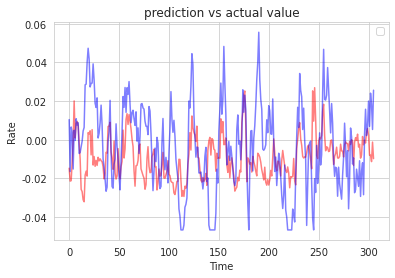

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 6 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  #df["Rate"] = df['Close'].pct_change()
  #df.dropna(inplace=True)
  #df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(5).sum())-1).shift(-5)
  #df.dropna(inplace=True)
  
  return df


KODEX200_predict = predict_data('2016-03-04', 'KODEX200.csv')
#KODEX200_predict.tail()
KODEX200_combined_predict = merge_data_set(KODEX200_predict, feature_list)
test=KODEX200_combined_predict.iloc[-6:]
test.drop(['Date', 'KODEX200_Close','KODEX200_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
#print(test.shape)

pred_kodex200=lgbm.predict(test)
pred_kodex200=pd.DataFrame({'prediction':pred_kodex200})
pred_kodex200.index = ["KODEX200"]
pred_kodex200.to_csv('Pred.csv', encoding='utf-8-sig')

### KODEX인버스

In [ ]:
feature_list = total_feature_list
KODEX인버스_combined = merge_data_set(KODEX인버스, feature_list)
KODEX인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,4515,4525,4450,4450,51737673,0.011236,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,4430,4465,4430,4440,20920712,0.011261,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,4460,4525,4450,4520,23085105,-0.005531,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,4490,4530,4470,4505,33444611,0.011099,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,4505,4540,4455,4520,30707084,0.042035,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KODEX인버스_combined.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX인버스_combined.drop('Rate', axis=1)
y = KODEX인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05579745760379355), 최대(0.04837995151871432)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 1.        , ..., 0.37954432, 0.79464808,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.36065432, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.15058098, 0.15869256, 0.15432099, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.15769504, 0.15987684, 0.15906933, ..., 0.        , 0.24630542,
        0.04936805],
       [0.16125207, 0.16224538, 0.15550807, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.022287672520156555
MAE: 0.018459187025475884
R2: -5.201450976688035


No handles with labels found to put in legend.


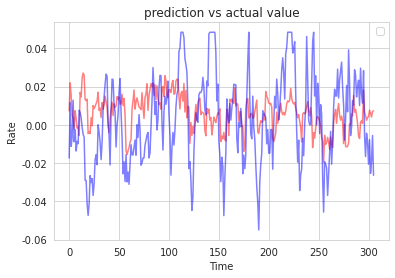

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KODEX인버스, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KODEX인버스_backtest.csv')

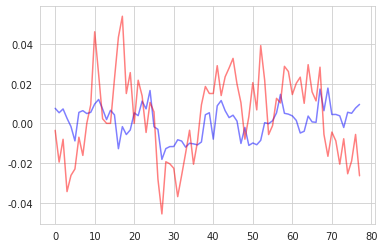

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0209
R2:-5.7562


#### 다음 주 예측

* 이전 6 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX인버스_predict = predict_data('2016-03-04', 'KODEX인버스.csv')
KODEX인버스_combined_predict = merge_data_set(KODEX인버스_predict, feature_list)
test=KODEX인버스_combined_predict.iloc[-6:]
test.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_KODEX인버스 = lgbm.predict(test)
pred_KODEX인버스=pd.DataFrame({"prediction":pred_KODEX인버스})
pred_KODEX인버스.index = ['KODEX인버스']

pred_KODEX인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER코스닥150

In [ ]:
feature_list = total_feature_list
TIGER코스닥150_combined = merge_data_set(TIGER코스닥150, feature_list)
TIGER코스닥150_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,12490,12725,12425,12715,76319,-0.031852,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,12790,12790,12630,12760,859635,-0.032132,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,12740,12740,12405,12405,133598,0.004837,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,12570,12740,12370,12600,71766,-0.021429,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,12725,12820,12475,12550,34923,-0.061753,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
TIGER코스닥150_combined.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER코스닥150_combined.drop('Rate', axis=1)
y = TIGER코스닥150_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.07758746655412496), 최대(0.07614398006329803)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.2505372 , 0.24339112, 0.25338693, ..., 0.37954432, 0.79464808,
        0.        ],
       [0.25801127, 0.24754088, 0.25259559, ..., 0.36065432, 1.        ,
        1.        ],
       [0.24773442, 0.23586008, 0.23202076, ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.6114727 , 0.5942764 , 0.57767789, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.58500202, 0.5942764 , 0.57213852, ..., 0.        , 0.24630542,
        0.04936805],
       [0.60913706, 0.60657199, 0.58875665, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 5개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.048757408249572115
MAE: 0.04262675922806519
R2: -4.223723409481088


No handles with labels found to put in legend.


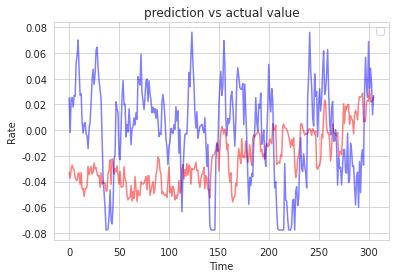

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(TIGER코스닥150, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('TIGER코스닥150_backtest.csv')

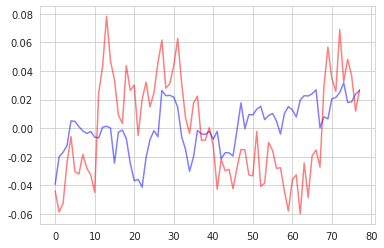

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0369
R2:-3.5924


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER코스닥150_predict = predict_data('2016-03-04', 'TIGER코스닥150.csv')
TIGER코스닥150_combined_predict = merge_data_set(TIGER코스닥150_predict, feature_list)
test=TIGER코스닥150_combined_predict.iloc[-6:]
test.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_TIGER코스닥150 = lgbm.predict(test)
pred_TIGER코스닥150=pd.DataFrame({"prediction":pred_TIGER코스닥150})
pred_TIGER코스닥150.index = ['TIGER코스닥150']

pred_TIGER코스닥150.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KINDEX일본Nikkey225

In [ ]:
feature_list = total_feature_list
KINDEX일본Nikkey225_combined = merge_data_set(KINDEX일본Nikkey225, feature_list)
KINDEX일본Nikkey225_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,17490,17675,17490,17675,8,0.043847,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,17735,17850,17640,17850,617,0.042297,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,17850,17850,17630,17630,29,0.057856,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,17675,17680,17575,17620,15217,0.033485,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,17640,17650,17555,17580,10167,0.011661,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KINDEX일본Nikkey225_combined.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KINDEX일본Nikkey225_combined.drop('Rate', axis=1)
y = KINDEX일본Nikkey225_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.056266160813657894), 최대(0.06247740591596348)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.02507341, 0.01688809, 0.03187614, ..., 0.37954432, 0.79464808,
        0.        ],
       [0.02563813, 0.01632515, 0.02333789, ..., 0.36065432, 1.        ,
        1.        ],
       [0.02337926, 0.01407341, 0.00739982, ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.85068895, 0.83877505, 0.8390255 , ..., 0.24096893, 0.45281233,
        0.        ],
       [0.83092388, 0.81963522, 0.83276412, ..., 0.        , 0.24630542,
        0.04936805],
       [0.82697086, 0.8162576 , 0.83048725, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02940124650592061
MAE: 0.023506699691678196
R2: -1.5168657404546533


No handles with labels found to put in legend.


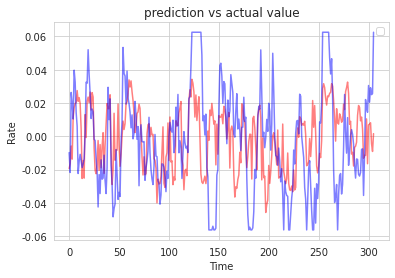

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KINDEX일본Nikkey225, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KINDEX일본Nikkey225_backtest.csv')

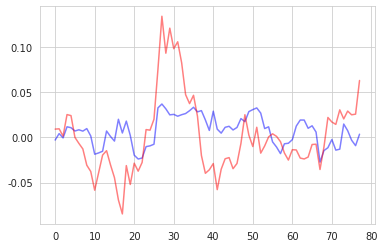

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0392
R2:-4.9288


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KINDEX일본Nikkey225_predict = predict_data('2016-03-04', 'KINDEX일본Nikkey225(H).csv')
KINDEX일본Nikkey225_combined_predict = merge_data_set(KINDEX일본Nikkey225_predict, feature_list)
test=KINDEX일본Nikkey225_combined_predict.iloc[-6:]
test.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_KINDEX일본Nikkey225 = lgbm.predict(test)
pred_KINDEX일본Nikkey225=pd.DataFrame({"prediction":pred_KINDEX일본Nikkey225})
pred_KINDEX일본Nikkey225.index = ['KINDEX일본Nikkey225']

pred_KINDEX일본Nikkey225.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER차이나CSI300

In [ ]:
feature_list = total_feature_list
TIGER차이나CSI300_combined = merge_data_set(TIGER차이나CSI300, feature_list)
TIGER차이나CSI300_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,10000,10185,9905,10180,578526,0.017682,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,10200,10260,10040,10100,432430,0.029703,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,10190,10190,9950,9955,348657,0.033149,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,10000,10000,9840,9870,42660,0.071935,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,9920,9965,9760,9870,24393,0.057244,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
TIGER차이나CSI300_combined.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER차이나CSI300_combined.drop('Rate', axis=1)
y = TIGER차이나CSI300_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05401086327471938), 최대(0.05877505412389119)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.03635347, 0.02579276, 0.02947582, ..., 0.37954432, 0.79464808,
        0.        ],
       [0.04548844, 0.03900551, 0.04374437, ..., 0.36065432, 1.        ,
        1.        ],
       [0.04735272, 0.03677237, 0.00826074, ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.65995526, 0.64828048, 0.63006909, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.62453393, 0.61292244, 0.60941724, ..., 0.        , 0.24630542,
        0.04936805],
       [0.60961969, 0.60640911, 0.59439772, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02759118436044205
MAE: 0.02194203292492296
R2: -5.344880243892609


No handles with labels found to put in legend.


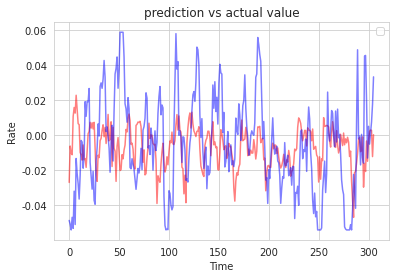

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(TIGER차이나CSI300, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('TIGER차이나CSI300_backtest.csv')

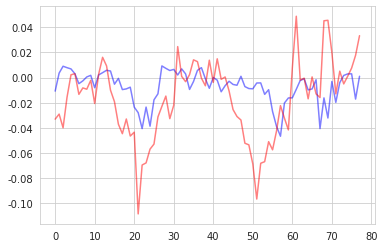

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0309
R2:-4.9002


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER차이나CSI300_predict = predict_data('2016-03-04', 'TIGER차이나CSI300.csv')
TIGER차이나CSI300_combined_predict = merge_data_set(TIGER차이나CSI300_predict, feature_list)
test=TIGER차이나CSI300_combined_predict.iloc[-6:]
test.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_TIGER차이나CSI300 = lgbm.predict(test)
pred_TIGER차이나CSI300=pd.DataFrame({"prediction":pred_TIGER차이나CSI300})
pred_TIGER차이나CSI300.index = ['TIGER차이나CSI300']

pred_TIGER차이나CSI300.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER유로스탁스50

In [ ]:
feature_list = total_feature_list
TIGER유로스탁스50_combined = merge_data_set(TIGER유로스탁스50, feature_list)
TIGER유로스탁스50_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,12615,12655,12540,12635,8060,0.047487,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,12665,12775,12640,12725,7223,0.034185,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,12740,12760,12625,12650,2413,0.020158,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,12750,12750,12610,12700,2713,0.006299,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,12780,12795,12630,12630,5096,-0.035234,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
TIGER유로스탁스50_combined.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER유로스탁스50_combined.drop('Rate', axis=1)
y = TIGER유로스탁스50_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.048043593051312755), 최대(0.04926921545201093)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.01079914, 0.01009884, 0.02704457, ..., 0.37954432, 0.79464808,
        0.        ],
       [0.01727862, 0.0090245 , 0.02596279, ..., 0.36065432, 1.        ,
        1.        ],
       [0.01187905, 0.00687581, 0.01189961, ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.67710583, 0.66867211, 0.67178711, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.67926566, 0.66652342, 0.66854176, ..., 0.        , 0.24630542,
        0.04936805],
       [0.68574514, 0.67619252, 0.67286889, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.025620539055345785
MAE: 0.02074839948632166
R2: -7.195972545558176


No handles with labels found to put in legend.


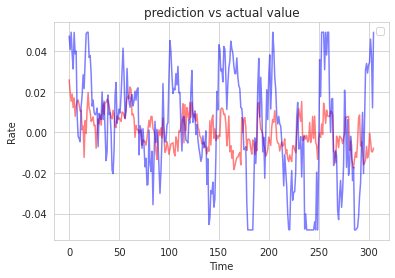

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

#### 백테스팅 자료

In [ ]:
df = merge_data_set(TIGER유로스탁스50, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.fit_transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('TIGER유로스탁스50_backtest.csv')

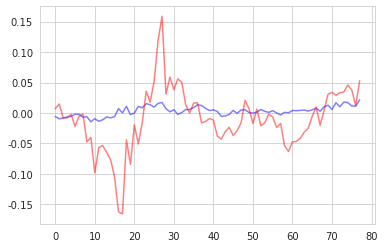

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0482
R2:-36.5167


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER유로스탁스50_predict = predict_data('2016-03-04', 'TIGER유로스탁스50(H).csv')
TIGER유로스탁스50_combined_predict = merge_data_set(TIGER유로스탁스50_predict, feature_list)
test=TIGER유로스탁스50_combined_predict.iloc[-6:]
test.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_TIGER유로스탁스50 = lgbm.predict(test)
pred_TIGER유로스탁스50=pd.DataFrame({"prediction":pred_TIGER유로스탁스50})
pred_TIGER유로스탁스50.index = ['TIGER유로스탁스50']

pred_TIGER유로스탁스50.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER미국SP500선물

In [ ]:
feature_list = total_feature_list
TIGER미국SP500선물_combined = merge_data_set(TIGER미국SP500선물, feature_list)
TIGER미국SP500선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,45985,46250,45980,46120,83142,0.044883,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,46255,46455,46105,46450,295147,0.050054,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,46445,46445,46110,46160,13054,0.045711,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,46505,46685,46370,46505,55623,0.017740,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,46705,46980,46570,46620,14209,-0.036036,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
TIGER미국SP500선물_combined.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER미국SP500선물_combined.drop('Rate', axis=1)
y = TIGER미국SP500선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.050941043521888975), 최대(0.04716684343425624)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.37954432, 0.79464808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.36065432, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.76917664, 0.76561677, 0.75957207, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.77128783, 0.77404403, 0.76872185, ..., 0.        , 0.24630542,
        0.04936805],
       [0.77832512, 0.78440254, 0.77576014, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.025825934826790766
MAE: 0.021671769323283845
R2: -4.290090458052857


No handles with labels found to put in legend.


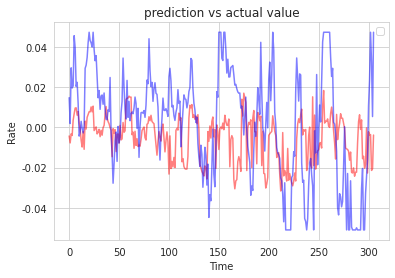

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(TIGER미국SP500선물, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.fit_transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('TIGER미국SP500선물_backtest.csv')

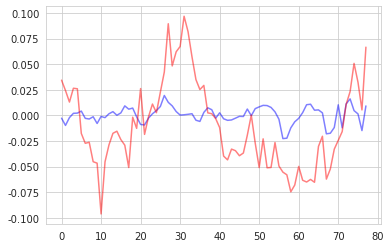

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0419
R2:-25.2347


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER미국SP500선물_predict = predict_data('2016-03-04', 'TIGER미국SP500선물(H).csv')
TIGER미국SP500선물_combined_predict = merge_data_set(TIGER미국SP500선물_predict, feature_list)
test=TIGER미국SP500선물_combined_predict.iloc[-6:]
test.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_TIGER미국SP500선물 = lgbm.predict(test)
pred_TIGER미국SP500선물=pd.DataFrame({"prediction":pred_TIGER미국SP500선물})
pred_TIGER미국SP500선물.index = ['TIGER미국SP500선물']

pred_TIGER미국SP500선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF국고채10년


In [ ]:
feature_list = total_feature_list
KOSEF국고채10년_combined = merge_data_set(KOSEF국고채10년, feature_list)
KOSEF국고채10년_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,110805,111455,110805,111385,8418,-0.022534,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,112665,112665,110970,111170,28958,-0.014797,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,111170,111755,111095,111695,8707,-0.022069,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,112075,112125,111790,112110,7157,-0.026403,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,112200,112200,111115,111475,13623,-0.031352,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KOSEF국고채10년_combined.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF국고채10년_combined.drop('Rate', axis=1)
y = KOSEF국고채10년_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.01503086138758831), 최대(0.013560508615283006)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.17575476, 0.16916756, 0.18171857, ..., 0.        , 0.37954432,
        0.        ],
       [0.19697024, 0.19036561, 0.17581822, ..., 0.00458933, 0.36065432,
        1.        ],
       [0.19005733, 0.18345838, 0.20122583, ..., 0.        , 0.3747718 ,
        1.        ],
       ...,
       [0.18916342, 0.21739907, 0.19580714, ..., 0.03243127, 0.24096893,
        0.        ],
       [0.24309603, 0.23943075, 0.23765142, ..., 0.04512842, 0.        ,
        0.04936805],
       [0.25054529, 0.24389663, 0.19701129, ..., 0.05966131, 0.        ,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.008738398069541402
MAE: 0.007296037978429609
R2: -28.606229214831032


No handles with labels found to put in legend.


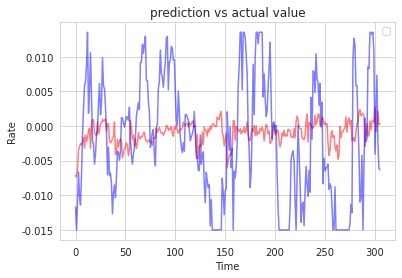

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KOSEF국고채10년, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KOSEF국고채10년_backtest.csv')

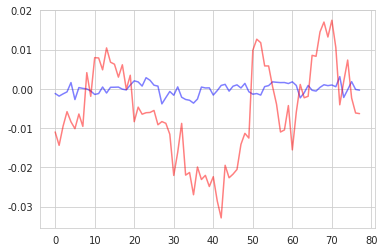

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.013
R2:-75.9648


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF국고채10년_predict = predict_data('2016-03-04', 'KOSEF국고채10년.csv')
KOSEF국고채10년_combined_predict = merge_data_set(KOSEF국고채10년_predict, feature_list)
test=KOSEF국고채10년_combined_predict.iloc[-6:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_KOSEF국고채10년 = lgbm.predict(test)
pred_KOSEF국고채10년=pd.DataFrame({"prediction":pred_KOSEF국고채10년})
pred_KOSEF국고채10년.index = ['KOSEF국고채10년']

pred_KOSEF국고채10년.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KBSTAR중기우량회사채

In [ ]:
feature_list = total_feature_list
KBSTAR중기우량회사채_combined = merge_data_set(KBSTAR중기우량회사채, feature_list)
KBSTAR중기우량회사채_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,102460,102610,102460,102555,412,-0.003998,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,102555,102635,102465,102540,3280,-0.004096,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,102525,102675,102510,102665,446,-0.003994,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,102660,102730,102630,102645,612,-0.004871,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,102720,102720,102560,102685,802,-0.008765,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KBSTAR중기우량회사채_Close','KBSTAR중기우량회사채_Volume'], axis=1, inplace=True)

In [ ]:
X = KBSTAR중기우량회사채_combined.drop('Rate', axis=1)
y = KBSTAR중기우량회사채_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.0038210136148902666), 최대(0.0037254513093431187)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.37954432, 0.79464808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.36065432, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.73401423, 0.74486409, 0.73735797, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.7468523 , 0.75008062, 0.74877719, ..., 0.        , 0.24630542,
        0.04936805],
       [0.7525581 , 0.74913216, 0.74211598, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.0031159194175366402
MAE: 0.0025375510039127493
R2: -17.868619555974348


No handles with labels found to put in legend.


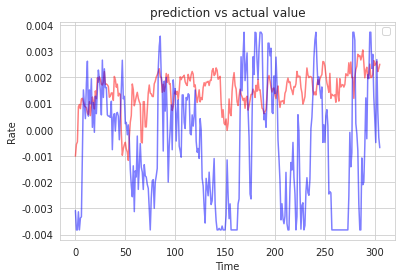

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KBSTAR중기우량회사채, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'KBSTAR중기우량회사채_Close','KBSTAR중기우량회사채_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KBSTAR중기우량회사채_backtest.csv')

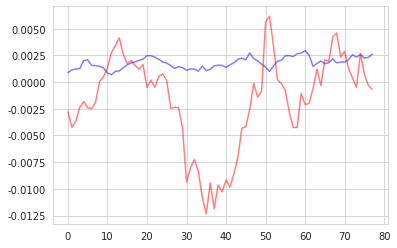

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0055
R2:-110.7403


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KBSTAR중기우량회사채_predict = predict_data('2016-03-04', 'KBSTAR중기우량회사채.csv')
KBSTAR중기우량회사채_combined_predict = merge_data_set(KBSTAR중기우량회사채_predict, feature_list)
test=KBSTAR중기우량회사채_combined_predict.iloc[-6:]
test.drop(['Date', 'KBSTAR중기우량회사채_Close','KBSTAR중기우량회사채_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_KBSTAR중기우량회사채 = lgbm.predict(test)
pred_KBSTAR중기우량회사채=pd.DataFrame({"prediction":pred_KBSTAR중기우량회사채})
pred_KBSTAR중기우량회사채.index = ['KBSTAR중기우량회사채']

pred_KBSTAR중기우량회사채.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER단기선진하이일드


In [ ]:
feature_list = total_feature_list
TIGER단기선진하이일드_combined = merge_data_set(TIGER단기선진하이일드, feature_list)
TIGER단기선진하이일드_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,11740,11755,11720,11720,10152,0.024744,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,11710,11775,11685,11775,2917,0.014862,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,11760,11800,11760,11785,2702,0.016122,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,11810,11810,11720,11800,387,0.011441,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,11900,11900,11840,11840,765,-0.007179,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
TIGER단기선진하이일드_combined.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER단기선진하이일드_combined.drop('Rate', axis=1)
y = TIGER단기선진하이일드_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.012413530603474832), 최대(0.01542474942335272)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.37954432, 0.79464808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.36065432, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.69781312, 0.69824141, 0.70649144, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.71769384, 0.70223821, 0.69056153, ..., 0.        , 0.24630542,
        0.04936805],
       [0.75347913, 0.73820943, 0.73835125, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.006676766156568171
MAE: 0.005282384694867555
R2: -16.458889333210056


No handles with labels found to put in legend.


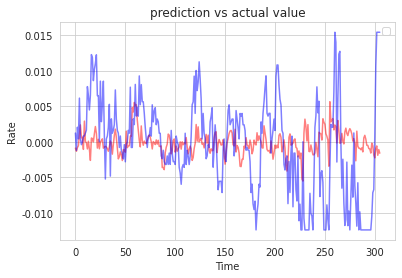

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(TIGER단기선진하이일드, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('TIGER단기선진하이일드_backtest.csv')

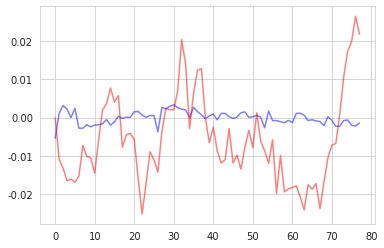

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0128
R2:-56.0078


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER단기선진하이일드_predict = predict_data('2016-03-04', 'TIGER단기선진하이일드(H).csv')
TIGER단기선진하이일드_combined_predict = merge_data_set(TIGER단기선진하이일드_predict, feature_list)
test=TIGER단기선진하이일드_combined_predict.iloc[-6:]
test.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_TIGER단기선진하이일드 = lgbm.predict(test)
pred_TIGER단기선진하이일드=pd.DataFrame({"prediction":pred_TIGER단기선진하이일드})
pred_TIGER단기선진하이일드.index = ['TIGER단기선진하이일드']

pred_TIGER단기선진하이일드.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KODEX골드선물


In [ ]:
feature_list = total_feature_list
KODEX골드선물_combined = merge_data_set(KODEX골드선물, feature_list)
KODEX골드선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,12370,12435,12340,12435,35205,-0.005629,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,12425,12500,12420,12475,108427,-0.003607,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,12475,12490,12440,12455,31019,-0.002007,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,12550,12565,12490,12495,62250,-0.008403,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,12475,12475,12390,12420,91032,0.009662,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KODEX골드선물_combined.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX골드선물_combined.drop('Rate', axis=1)
y = KODEX골드선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.04100640675927105), 최대(0.04330395359807136)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.18323353, 0.1854067 , 0.18562439, ..., 0.37954432, 0.79464808,
        0.        ],
       [0.19041916, 0.1937799 , 0.18804453, ..., 0.36065432, 1.        ,
        1.        ],
       [0.19401198, 0.19976077, 0.20014521, ..., 0.3747718 , 0.2203529 ,
        1.        ],
       ...,
       [0.84191617, 0.83971292, 0.84874153, ..., 0.24096893, 0.45281233,
        0.        ],
       [0.85988024, 0.8576555 , 0.86084221, ..., 0.        , 0.24630542,
        0.04936805],
       [0.84191617, 0.8361244 , 0.83664085, ..., 0.        , 0.09726977,
        0.03294066]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02693851419959497
MAE: 0.022463891950055066
R2: -19.634924222274705


No handles with labels found to put in legend.


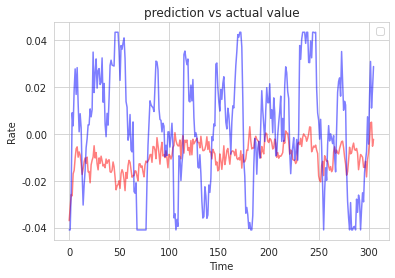

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KODEX골드선물, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KODEX골드선물_backtest.csv')

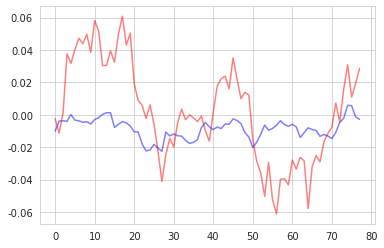

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.03
R2:-22.9169


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX골드선물_predict = predict_data('2016-03-04', 'KODEX골드선물(H).csv')
KODEX골드선물_combined_predict = merge_data_set(KODEX골드선물_predict, feature_list)
test=KODEX골드선물_combined_predict.iloc[-6:]
test.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_KODEX골드선물 = lgbm.predict(test)
pred_KODEX골드선물=pd.DataFrame({"prediction":pred_KODEX골드선물})
pred_KODEX골드선물.index = ['KODEX골드선물']

pred_KODEX골드선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER원유선물

In [ ]:
feature_list = total_feature_list
TIGER원유선물_combined = merge_data_set(TIGER원유선물, feature_list)
TIGER원유선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,5505,5540,5470,5520,56571,0.086957,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,5550,5610,5535,5585,843903,0.085944,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,5525,5550,5490,5495,92450,0.121019,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,5585,5615,5570,5580,156171,0.097670,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,5585,5615,5570,5585,107893,0.069830,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
TIGER원유선물_combined.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER원유선물_combined.drop('Rate', axis=1)
y = TIGER원유선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.10183427839765875), 최대(0.1006647392264435)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.49939467, 0.50226244, 0.50303582, ..., 0.        , 0.37954432,
        0.79464808],
       [0.54176755, 0.55354449, 0.54553734, ..., 0.00458933, 0.36065432,
        1.        ],
       [0.58565375, 0.58371041, 0.56830601, ..., 0.        , 0.3747718 ,
        0.2203529 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.03243127, 0.24096893,
        0.45281233],
       [1.        , 1.        , 1.        , ..., 0.04512842, 0.        ,
        0.24630542],
       [1.        , 1.        , 1.        , ..., 0.05966131, 0.        ,
        0.09726977]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled.shape

(1528, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-5].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.06497856591196864
MAE: 0.05331894558161105
R2: -4.8271101576731


No handles with labels found to put in legend.


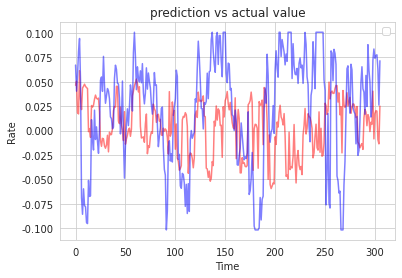

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(TIGER원유선물, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[5:].reset_index(drop=True)
actual = df.Rate[:-5].reset_index(drop=True)
df.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 6)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('TIGER원유선물_backtest.csv')

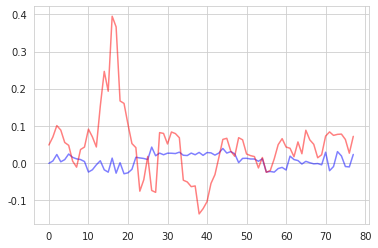

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.1015
R2:-30.2669


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER원유선물_predict = predict_data('2016-03-04', 'TIGER원유선물(H).csv')
TIGER원유선물_combined_predict = merge_data_set(TIGER원유선물_predict, feature_list)
test=TIGER원유선물_combined_predict.iloc[-6:]
test.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,6,41)
test=test.mean(axis=1)
pred_TIGER원유선물 = lgbm.predict(test)
pred_TIGER원유선물=pd.DataFrame({"prediction":pred_TIGER원유선물})
pred_TIGER원유선물.index = ['TIGER원유선물']

pred_TIGER원유선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물_combined = merge_data_set(KOSEF미국달러선물, feature_list)
KOSEF미국달러선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,13275,13335,13265,13285,2823,-0.007527,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,13295,13310,13245,13245,3425,-0.006418,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,13220,13260,13220,13260,3046,-0.005279,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,13210,13260,13205,13260,4020,0.002640,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,13260,13305,13235,13280,5181,0.013931,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KOSEF미국달러선물_combined.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.022677425820559628), 최대(0.025901666774111917)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.39076971,  0.42753359,  0.34067508, ...,  0.14366294,
         2.3115266 , -0.30603876],
       [ 0.1631195 ,  0.23357773,  0.22211266, ...,  0.07255602,
         3.07489919,  3.73623152],
       [ 0.21390301,  0.29298764,  0.21339484, ...,  0.12569791,
         0.17664911,  3.73623152],
       ...,
       [ 1.79519637,  1.80060127,  1.78190589, ..., -0.37797107,
         1.04079082, -0.30603876],
       [ 1.79519637,  1.80060127,  1.78190589, ..., -1.28504114,
         0.27312467, -0.10647976],
       [ 1.79519637,  1.80060127,  1.78190589, ..., -1.28504114,
        -0.28089854, -0.17288372]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1527, 7, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1527, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1527, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.009008772312830215
MAE: 0.007163120356740434
R2: -0.1350629383681039


No handles with labels found to put in legend.


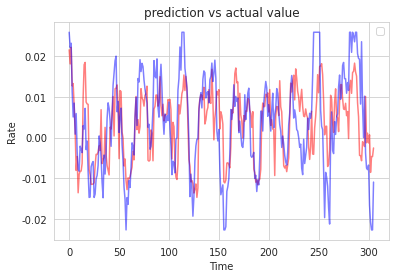

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KOSEF미국달러선물, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[6:].reset_index(drop=True)
actual = df.Rate[:-6].reset_index(drop=True)
df.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KOSEF미국달러선물_backtest.csv')

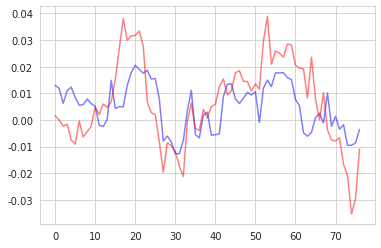

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0125
R2:-0.9889


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물_predict = predict_data('2016-03-04', 'KOSEF미국달러선물.csv')
KOSEF미국달러선물_combined_predict = merge_data_set(KOSEF미국달러선물_predict, feature_list)
test=KOSEF미국달러선물_combined_predict.iloc[-7:]
test.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 41)

In [ ]:
test=test.reshape(1,7,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물 = lgbm.predict(test)
pred_KOSEF미국달러선물=pd.DataFrame({"prediction":pred_KOSEF미국달러선물})
pred_KOSEF미국달러선물.index = ['KOSEF미국달러선물']

pred_KOSEF미국달러선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물인버스


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물인버스_combined = merge_data_set(KOSEF미국달러선물인버스, feature_list)
KOSEF미국달러선물인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,9410,9415,9385,9415,22242,0.008497,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,9395,9450,9395,9450,5158,0.007937,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,9450,9460,9425,9425,6519,0.007958,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,9455,9460,9440,9445,3551,-0.003176,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,9445,9445,9400,9430,1409,-0.014316,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KOSEF미국달러선물인버스_combined.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물인버스_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.025539851946594673), 최대(0.022572455525728948)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.73993173, -0.59247412, -0.6971553 , ..., -0.5102129 ,
         2.3115266 , -0.30603876],
       [-0.49618122, -0.50128999, -0.51145629, ..., -0.49251966,
         3.07489919,  3.73623152],
       [-0.50633749, -0.55194784, -0.58367257, ..., -0.5102129 ,
         0.17664911,  3.73623152],
       ...,
       [-1.72915255, -1.71707838, -1.72881646, ..., -0.38518067,
         1.04079082, -0.30603876],
       [-1.72915255, -1.71707838, -1.72881646, ..., -0.33622938,
         0.27312467, -0.10647976],
       [-1.72915255, -1.71707838, -1.72881646, ..., -0.28020079,
        -0.28089854, -0.17288372]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1527, 7, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1527, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1527, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.009215683808568909
MAE: 0.007410238171216523
R2: -0.05422026563062632


No handles with labels found to put in legend.


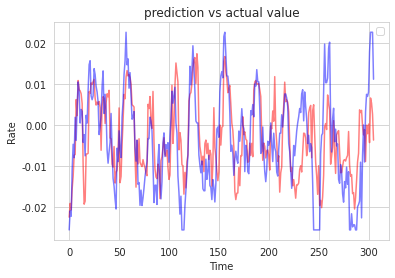

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KOSEF미국달러선물인버스, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[6:].reset_index(drop=True)
actual = df.Rate[:-6].reset_index(drop=True)
df.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KOSEF미국달러선물인버스_backtest.csv')

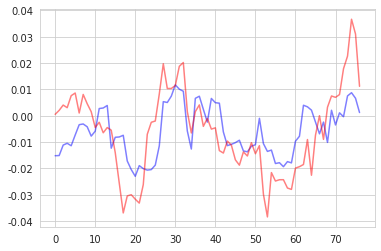

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0125
R2:-0.8413


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물인버스_predict = predict_data('2016-03-04', 'KOSEF미국달러선물인버스.csv')
KOSEF미국달러선물인버스_combined_predict = merge_data_set(KOSEF미국달러선물인버스_predict, feature_list)
test=KOSEF미국달러선물인버스_combined_predict.iloc[-7:]
test.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 41)

In [ ]:
test=test.reshape(1,7,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물인버스 = lgbm.predict(test)
pred_KOSEF미국달러선물인버스=pd.DataFrame({"prediction":pred_KOSEF미국달러선물인버스})
pred_KOSEF미국달러선물인버스.index = ['KOSEF미국달러선물인버스']

pred_KOSEF미국달러선물인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF단기자금


In [ ]:
feature_list = total_feature_list
KOSEF단기자금_combined = merge_data_set(KOSEF단기자금, feature_list)
KOSEF단기자금_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX골드선물(H)_Volume,TIGER차이나CSI300_Volume,TIGER미국SP500선물(H)_Volume,KBSTAR중기우량회사채_Volume,KOSEF미국달러선물_Volume,TIGER단기선진하이일드(H)_Volume,KODEX인버스_Volume,KOSEF미국달러선물인버스_Volume,KOSEF국고채10년_Volume,TIGER원유선물(H)_Volume
1528,2022-05-20,101365,101380,101365,101370,70569,0.000049,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8
1529,2022-05-23,101370,101375,101365,101370,1340,0.000148,1863.000000,8.822,111.959999,...,5876025,1340,3425,843903,295147,28958,3280,432430,5158,617
1530,2022-05-24,101375,101380,101370,101375,839,0.000444,1867.000000,8.930,111.430000,...,5416640,839,3046,92450,13054,8707,446,348657,6519,29
1531,2022-05-25,101375,101385,101375,101385,1797,0.000395,1846.199951,9.399,111.680000,...,6735545,1797,4020,156171,55623,7157,612,42660,3551,15217
1532,2022-05-26,101390,101390,101310,101355,5572,0.000395,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167


In [ ]:
KOSEF단기자금_combined.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF단기자금_combined.drop('Rate', axis=1)
y = KOSEF단기자금_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-4.997651103975098e-05), 최대(0.0010355438991780817)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.58044132, -1.57819168, -1.58453984, ...,  0.14366294,
         2.3115266 , -0.30603876],
       [-1.58044132, -1.57819168, -1.58453984, ...,  0.07255602,
         3.07489919,  3.73623152],
       [-1.58044132, -1.57819168, -1.58453984, ...,  0.12569791,
         0.17664911,  3.73623152],
       ...,
       [ 1.29447509,  1.30688554,  1.29288462, ..., -0.37797107,
         1.04079082, -0.30603876],
       [ 1.29447509,  1.30688554,  1.29288462, ..., -1.28504114,
         0.27312467, -0.10647976],
       [ 1.29447509,  1.30688554,  1.29288462, ..., -1.28504114,
        -0.28089854, -0.17288372]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1533, 41)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1527, 7, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1527, 41)

In [ ]:
# 끝에 6개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1527, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.00033203785035757595
MAE: 0.0002617270171754722
R2: -19.62719366508644


No handles with labels found to put in legend.


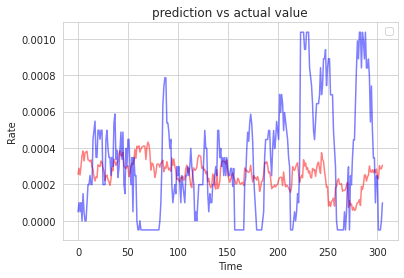

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

#### 백테스팅 자료

In [ ]:
df = merge_data_set(KOSEF단기자금, feature_list)
df = df[df.Date >= "2022-01-23"].reset_index(drop=True)
date = df.Date[6:].reset_index(drop=True)
actual = df.Rate[:-6].reset_index(drop=True)
df.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'], axis=1, inplace=True)
X, y = df.drop('Rate', axis=1), df[['Rate']]
X_scaled = scaler.transform(X)
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled = X_scaled.mean(axis=1)
pred = lgbm.predict(X_scaled)
data_frame = pd.DataFrame({'Date': date, 'Actual': actual, 'Pred': pred})

In [ ]:
data_frame.to_csv('KOSEF단기자금_backtest.csv')

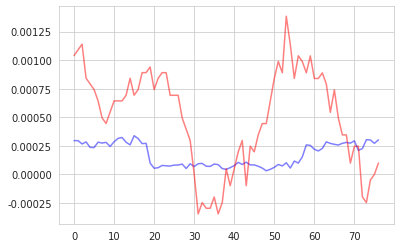

In [ ]:
plt.plot(pred, alpha=0.5, color='blue')
plt.plot(actual, alpha=0.5, color='red')
plt.show()

In [ ]:
print(f"RMSE:{round(mean_squared_error(pred, actual) ** 0.5,4)}")
print(f"R2:{round(r2_score(pred, actual),4)}")

RMSE:0.0005
R2:-27.5125


#### 다음 주 예측

* 이전 7 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF단기자금_predict = predict_data('2016-03-04', 'KOSEF단기자금.csv')
KOSEF단기자금_combined_predict = merge_data_set(KOSEF단기자금_predict, feature_list)
test=KOSEF단기자금_combined_predict.iloc[-7:]
test.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 41)

In [ ]:
test=test.reshape(1,7,41)
test=test.mean(axis=1)
pred_KOSEF단기자금 = lgbm.predict(test)
pred_KOSEF단기자금=pd.DataFrame({"prediction":pred_KOSEF단기자금})
pred_KOSEF단기자금.index = ['KOSEF단기자금']

pred_KOSEF단기자금.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)